In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 317us/step - loss: 1.9264 - acc: 0.3010 - val_loss: 1.7708 - val_acc: 0.3680
Epoch 2/100
50000/50000 [==============================] - 13s 256us/step - loss: 1.7143 - acc: 0.3838 - val_loss: 1.6304 - val_acc: 0.4219
Epoch 3/100
50000/50000 [==============================] - 14s 273us/step - loss: 1.6200 - acc: 0.4196 - val_loss: 1.5771 - val_acc: 0.4359
Epoch 4/100
50000/50000 [==============================] - 13s 262us/step - loss: 1.5554 - acc: 0.4460 - val_loss: 1.6338 - val_acc: 0.4222
Epoch 5/100
50000/50000 [==============================] - 13s 255us/step - loss: 1.5142 - acc: 0.4587 - val_loss: 1.5449 - val_acc: 0.4493
Epoch 6/100
50000/50000 [==============================] - 15s 295us/step - loss: 1.4670 - acc: 0.4768 - val_loss: 1.4677 - val_acc: 0.4755
Epoch 7/100
50000/50000 [==============================] - 14s

Epoch 57/100
50000/50000 [==============================] - 19s 381us/step - loss: 0.5748 - acc: 0.7955 - val_loss: 1.9030 - val_acc: 0.5097
Epoch 58/100
50000/50000 [==============================] - 14s 279us/step - loss: 0.5627 - acc: 0.7976 - val_loss: 1.9747 - val_acc: 0.5201
Epoch 59/100
50000/50000 [==============================] - 13s 266us/step - loss: 0.5491 - acc: 0.8041 - val_loss: 1.9750 - val_acc: 0.5103
Epoch 60/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.5666 - acc: 0.7958 - val_loss: 1.9838 - val_acc: 0.5162
Epoch 61/100
50000/50000 [==============================] - 14s 271us/step - loss: 0.5500 - acc: 0.8027 - val_loss: 2.0755 - val_acc: 0.4964
Epoch 62/100
50000/50000 [==============================] - 13s 259us/step - loss: 0.5374 - acc: 0.8077 - val_loss: 1.9897 - val_acc: 0.5114
Epoch 63/100
50000/50000 [==============================] - 13s 270us/step - loss: 0.5166 - acc: 0.8148 - val_loss: 2.0570 - val_acc: 0.5042
Epoch 64/100


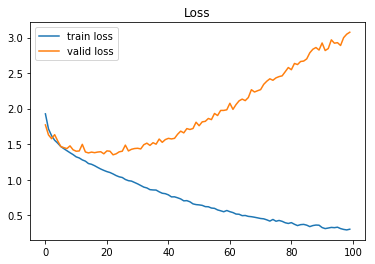

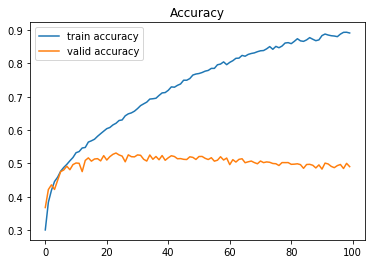

In [9]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [10]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [12]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [13]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [16]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 167us/step - loss: 2.2804 - acc: 0.1536 - val_loss: 2.2386 - val_acc: 0.1771
Epoch 2/500
50000/50000 [==============================] - 8s 158us/step - loss: 2.2102 - acc: 0.1995 - val_loss: 2.1869 - val_acc: 0.2142
Epoch 3/500
50000/50000 [==============================] - 8s 161us/step - loss: 2.1622 - acc: 0.2320 - val_loss: 2.1432 - val_acc: 0.2407
Epoch 4/500
50000/50000 [==============================] - 8s 157us/step - loss: 2.1206 - acc: 0.2519 - val_loss: 2.1044 - val_acc: 0.2607
Epoch 5/500
50000/50000 [==============================] - 8s 158us/step - loss: 2.0835 - acc: 0.2708 - val_loss: 2.0698 - val_acc: 0.2754
Epoch 6/500
50000/50000 [==============================] - 8s 160us/step - loss: 2.0506 - acc: 0.2826 - val_loss: 2.0387 - val_acc: 0.2853
Epoch 7/500
50000/50000 [==============================] - 8s 156us/step - loss: 2.0218 - acc: 0.2921 - val_loss: 2.

50000/50000 [==============================] - 8s 152us/step - loss: 1.6564 - acc: 0.4242 - val_loss: 1.6617 - val_acc: 0.4226
Epoch 60/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.6535 - acc: 0.4251 - val_loss: 1.6586 - val_acc: 0.4230
Epoch 61/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6504 - acc: 0.4246 - val_loss: 1.6555 - val_acc: 0.4275
Epoch 62/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.6477 - acc: 0.4267 - val_loss: 1.6545 - val_acc: 0.4247
Epoch 63/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.6446 - acc: 0.4276 - val_loss: 1.6494 - val_acc: 0.4289
Epoch 64/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.6418 - acc: 0.4288 - val_loss: 1.6508 - val_acc: 0.4253
Epoch 65/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.6389 - acc: 0.4289 - val_loss: 1.6447 - val_acc: 0.4281
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 8s 151us/step - loss: 1.5250 - acc: 0.4707 - val_loss: 1.5510 - val_acc: 0.4580
Epoch 118/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.5236 - acc: 0.4717 - val_loss: 1.5455 - val_acc: 0.4578
Epoch 119/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.5217 - acc: 0.4713 - val_loss: 1.5438 - val_acc: 0.4598
Epoch 120/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.5199 - acc: 0.4726 - val_loss: 1.5472 - val_acc: 0.4604
Epoch 121/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.5183 - acc: 0.4731 - val_loss: 1.5405 - val_acc: 0.4583
Epoch 122/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.5164 - acc: 0.4735 - val_loss: 1.5403 - val_acc: 0.4601
Epoch 123/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.5146 - acc: 0.4732 - val_loss: 1.5437 - val_acc: 0.4591
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 9s 185us/step - loss: 1.4334 - acc: 0.5018 - val_loss: 1.4802 - val_acc: 0.4792
Epoch 176/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.4323 - acc: 0.5007 - val_loss: 1.4838 - val_acc: 0.4759
Epoch 177/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.4308 - acc: 0.5012 - val_loss: 1.4845 - val_acc: 0.4749
Epoch 178/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.4291 - acc: 0.5028 - val_loss: 1.4914 - val_acc: 0.4760
Epoch 179/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.4283 - acc: 0.5040 - val_loss: 1.4781 - val_acc: 0.4783
Epoch 180/500
50000/50000 [==============================] - 9s 170us/step - loss: 1.4264 - acc: 0.5038 - val_loss: 1.4745 - val_acc: 0.4770
Epoch 181/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.4250 - acc: 0.5036 - val_loss: 1.4801 - val_acc: 0.4779
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 11s 217us/step - loss: 1.3542 - acc: 0.5265 - val_loss: 1.4326 - val_acc: 0.4949
Epoch 234/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.3530 - acc: 0.5276 - val_loss: 1.4416 - val_acc: 0.4883
Epoch 235/500
50000/50000 [==============================] - 11s 214us/step - loss: 1.3517 - acc: 0.5283 - val_loss: 1.4366 - val_acc: 0.4925
Epoch 236/500
50000/50000 [==============================] - 11s 223us/step - loss: 1.3502 - acc: 0.5275 - val_loss: 1.4271 - val_acc: 0.4956
Epoch 237/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.3489 - acc: 0.5293 - val_loss: 1.4305 - val_acc: 0.4914
Epoch 238/500
50000/50000 [==============================] - 10s 210us/step - loss: 1.3474 - acc: 0.5288 - val_loss: 1.4270 - val_acc: 0.4926
Epoch 239/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.3464 - acc: 0.5292 - val_loss: 1.4249 - val_acc: 0.4977
Epoch 240/500
50000/

50000/50000 [==============================] - 7s 150us/step - loss: 1.2834 - acc: 0.5509 - val_loss: 1.3941 - val_acc: 0.5075
Epoch 292/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.2825 - acc: 0.5520 - val_loss: 1.3892 - val_acc: 0.5103
Epoch 293/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.2810 - acc: 0.5508 - val_loss: 1.3911 - val_acc: 0.5067
Epoch 294/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.2798 - acc: 0.5514 - val_loss: 1.3989 - val_acc: 0.5042
Epoch 295/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.2794 - acc: 0.5518 - val_loss: 1.3904 - val_acc: 0.5066
Epoch 296/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.2775 - acc: 0.5516 - val_loss: 1.3897 - val_acc: 0.5084
Epoch 297/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.2764 - acc: 0.5539 - val_loss: 1.3973 - val_acc: 0.5074
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 8s 152us/step - loss: 1.2184 - acc: 0.5752 - val_loss: 1.3706 - val_acc: 0.5106
Epoch 350/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.2187 - acc: 0.5738 - val_loss: 1.3822 - val_acc: 0.5068
Epoch 351/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.2168 - acc: 0.5753 - val_loss: 1.3912 - val_acc: 0.5006
Epoch 352/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.2154 - acc: 0.5755 - val_loss: 1.3834 - val_acc: 0.5045
Epoch 353/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.2132 - acc: 0.5756 - val_loss: 1.3801 - val_acc: 0.5154
Epoch 354/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.2131 - acc: 0.5760 - val_loss: 1.3867 - val_acc: 0.5099
Epoch 355/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.2112 - acc: 0.5757 - val_loss: 1.3746 - val_acc: 0.5099
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 8s 150us/step - loss: 1.1565 - acc: 0.5953 - val_loss: 1.3762 - val_acc: 0.5083
Epoch 408/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.1553 - acc: 0.5965 - val_loss: 1.3636 - val_acc: 0.5186
Epoch 409/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.1542 - acc: 0.5977 - val_loss: 1.3685 - val_acc: 0.5187
Epoch 410/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.1543 - acc: 0.5964 - val_loss: 1.3521 - val_acc: 0.5201
Epoch 411/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.1533 - acc: 0.5962 - val_loss: 1.3850 - val_acc: 0.5110
Epoch 412/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.1520 - acc: 0.5960 - val_loss: 1.3434 - val_acc: 0.5244
Epoch 413/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.1513 - acc: 0.5976 - val_loss: 1.3695 - val_acc: 0.5193
Epoch 414/500
50000/50000 

50000/50000 [==============================] - 8s 152us/step - loss: 1.0972 - acc: 0.6160 - val_loss: 1.4015 - val_acc: 0.5159
Epoch 466/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.0968 - acc: 0.6185 - val_loss: 1.3434 - val_acc: 0.5308
Epoch 467/500
50000/50000 [==============================] - 8s 151us/step - loss: 1.0941 - acc: 0.6160 - val_loss: 1.3937 - val_acc: 0.5063
Epoch 468/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.0941 - acc: 0.6165 - val_loss: 1.3618 - val_acc: 0.5156
Epoch 469/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.0947 - acc: 0.6170 - val_loss: 1.3608 - val_acc: 0.5200
Epoch 470/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.0909 - acc: 0.6172 - val_loss: 1.3923 - val_acc: 0.5039
Epoch 471/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.0896 - acc: 0.6208 - val_loss: 1.3671 - val_acc: 0.5228
Epoch 472/500
50000/50000 [

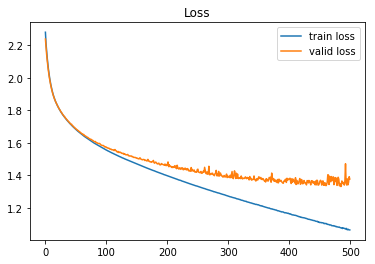

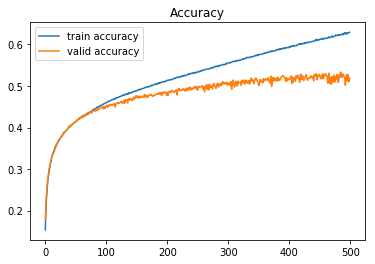

In [18]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()